# AIM 5001 M9 Assignment 
### Working with HTML, JSON, Web Scraping, and Web APIs 
## Team Members: Siddanta K.C., Aayush Bhetuwal, Pinxue Lin

# Part I 
## Importing the libraries 

In [2]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

import json
import requests

## Part I: Working with HTML and JSON

Besides title and authors, the published date, ISBN, Rating, Description and Total Pages of the books are obtained in html and json file both. They are uploaded in the github and using github link the data is accessed and load into the pandas dataframe.

Using read_html function, html file is obtained into pandas dataframe. Here, Multiples Author are stored in same table data placed with comma separator.

In [3]:
df = pd.read_html('https://raw.githubusercontent.com/SiddantaK/Data-Acquisition-Management/main/books.html') 

In [4]:
books = df[0]
books

,Title,Authors,Publish Date,ISBN,Rating,Description,Pages
0,The Chronicles of Narnia,"C.S. Lewis, Pauline Baynes (Illustrator)",09/16/02,9999999999999,4.26,"Journeys to the end of the world, fantastic cr...",767
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,09/28/04,9780439358071,4.50,There is a door at the end of a silent corrido...,870
2,The Alchemist,"Paulo Coelho, Alan R. Clarke",04/15/14,9780062315007,3.88,Paulo Coelho's enchanting novel has inspired a...,182


###  Two different approach to read the json url. read_json() and using requests.
Here multiple authors are stored into another two category as writer and illustrator

In [5]:
data = pd.read_json('https://raw.githubusercontent.com/SiddantaK/Data-Acquisition-Management/main/books.json')
data

,title,authors,publish date,isbn,rating,description,pages
0,The Chronicles of Narnia,"[{'writer': 'C.S. Lewis', 'illustrator': 'Paul...",09/16/02,9999999999999,4.26,"Journeys to the end of the world, fantastic cr...",767
1,Harry Potter and the Order of the Phoenix,[{'writer': 'J.K. Rowling'}],09/28/04,9780439358071,4.50,There is a door at the end of a silent corrido...,870
2,The Alchemist,"[{'writer': 'Paulo Coelho', 'illustrator': 'Al...",04/15/14,9780062315007,3.88,Paulo Coelho's enchanting novel has inspired a...,182


Result: The authors column looks odd, since it only loads the data into the column.

For this request method can be used to access the url and using the json_normalize function to separately manage the multiple author.

In [6]:
req = requests.get('https://raw.githubusercontent.com/SiddantaK/Data-Acquisition-Management/main/books.json')

data = json.loads(req.text)
df2 = pd.json_normalize(data, record_path =['authors'],meta=['title','publish date','isbn','rating','description','pages'])
df2

,writer,illustrator,title,publish date,isbn,rating,description,pages
0,C.S. Lewis,Pauline Baynes (Illustrator),The Chronicles of Narnia,09/16/02,9999999999999,4.26,"Journeys to the end of the world, fantastic cr...",767
1,J.K. Rowling,NaN,Harry Potter and the Order of the Phoenix,09/28/04,9780439358071,4.50,There is a door at the end of a silent corrido...,870
2,Paulo Coelho,Alan R. Clarke,The Alchemist,04/15/14,9780062315007,3.88,Paulo Coelho's enchanting novel has inspired a...,182


Results: Author is managed into two sub categories writer and illustrator. For single author, there is null value in second category(Illustrator).

Using json file results in much more flexibility and convenience compared to html file. The Html approach would be easier if the data we are trying to extract are always available in table format, however, this is not always the case, so we use different parsing techniques to parse through the data using the html tags which is time consuming. There are different tags in html which makes extracting the right data from the tags more complex to manage in a dataframe. 

BeautifulSoup can be useful in this approach as it automatically parses the data according to the html tags and presents the html file into a readable format by not including unwanted data. 

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   writer        3 non-null      object
 1   illustrator   2 non-null      object
 2   title         3 non-null      object
 3   publish date  3 non-null      object
 4   isbn          3 non-null      object
 5   rating        3 non-null      object
 6   description   3 non-null      object
 7   pages         3 non-null      object
dtypes: object(8)
memory usage: 320.0+ bytes


## Part 2: Scraping the Katz School’s “Staff” Web Page

Before scraping we should check its authority using robots.txt file. https://www.yu.edu/robots.txt. Since scraping is available we can check its response through the requests.

In [8]:
import requests
page = requests.get("https://www.yu.edu/katz/staff")
page

<Response [200]>

We get the response 200, which means the request has ben succesfull. 

In [9]:
# now convert the 'resp' object's JSON content into a list of native Python objects
page.status_code

200

In [10]:
#We can see the unmanaged html content.
page.content

b'\n<!DOCTYPE html>\n<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">\n  <head>\n    <!-- Google Tag Manager -->\n    <script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n                new Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n            j=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n            \'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n        })(window,document,\'script\',\'dataLayer\',\'GTM-PSVTTKK\');</script>\n    <!-- End Google Tag Manager -->\n    <!-- Start People Grove Cards -->\n    <script src="https://

### To parse through the unmanaged html page, we import BeautifulSoup and use its methods in order to prettify the html contents and tags from our downloaded "Staf" webpage. 

In [11]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser') #Creating a BeautifulSoup class to parse the downloaded page

In [12]:
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">
 <head>
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
                new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
            j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
            'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
        })(window,document,'script','dataLayer','GTM-PSVTTKK');
  </script>
  <!-- End Google Tag Manager -->
  <!-- Start People Grove Cards -->
  <script async="" src="https://cdn.peoplegrove.com/pg-widge

We can see how BeautifulSoup parsed through our html content and made it more readable. 

In [174]:
'''Locating the div with class=”text-only” for the purpose of finding our Staff Information from the content of the html page 
and assigning the results to a variable named staff'''
staff=soup.find_all('div', class_='text-only')
print(staff[0].select('p')) 

[<p>Paul Russo, Vice Provost and Dean <br/>
<a href="/faculty/pages/russo-paul">Read Dr. Russo's full biography</a> </p>, <p>Aaron Ross, Director of Strategic Initiatives and Deputy to the Dean <br/>
<a href="mailto:Aaron.Ross2@yu.edu">aaron.ross2@yu.edu</a> | 646-592-4148  <br/>
 <br/>
Sofia Binioris, Senior Project Manager and Advisor to the Dean <br/>
<a href="mailto:Sofia.Binioris@yu.edu">sofia.binioris@yu.edu</a>  </p>, <p>Jackie Hamilton, Director of Global Engagement and New Business Development<br/>
<a href="mailto:jackie.hamilton@yu.edu">jackie.hamilton@yu.edu</a> I 646-787-6194</p>, <p>Tabitha Collazo, Business and Operations Coordinator<br/>
<a href="mailto:tabitha.collazo@yu.edu">tabitha.collazo@yu.edu</a> | 646-592-4735</p>, <p>Jared Hakimi, Director<br/>
<a href="mailto:jared.hakimi@yu.edu">jared.hakimi@yu.edu</a> | 646-592-4722 | <a href="https://go.yu.edu/meetings/jared-hakimi?_ga=2.135529905.1027554153.1643634144-1633120133.1643634142">Schedule an Appointment</a></p>, 

There are lots of umanaged html div in the staff portal of the University website. All the section are not in same pattern so it is impossible to directly store the value in the dataframe. Using the string processing and some features of BeautifulSoup Class, individual attributes are obtained and stored in dictionary variable for now.

For office, the "finding the sibling" function of the Beautiful class is used to obtained the office attributes for each staff.

For email, using regex to obtain the emails and because of html div patterns we have to use the len function to
seperate the different cases for each staff.

Similar to email, Phone data is obtained using the regex.
Like-wise for the name and title, single regex is used to obtained them.
All data (office, name, email, title, phone) are stored in the dictionary.

In [175]:
my_dict = {"office":[],"name":[],"email":[],"title":[],"phone":[]};

office =staff[0].select('h3')[0]
sibling =office.find_next_sibling()
temp_office = office.get_text().replace(u'\xa0' , u'')
my_dict["office"].append(temp_office)
paragraph =staff[0].select('p')
for count,p in enumerate(paragraph):
    
    while True:
        if(sibling !=None):
            temp_office = sibling.find_previous_sibling('h3').text.replace(u'\xa0' , u'')
            my_dict["office"].append(temp_office)
            sibling = sibling.find_next_sibling('p')
        else:
            break
    
    email = re.findall(r'(\w+).(\w+)@yu.edu',p.get_text()) #extracting the email from the html content using regular expression
    if not email:
        my_dict["email"].append('N/A') #the staff information containing no email address is replaced by N/A 
    else:
        if len(email) == 2:
            my_dict["email"].append(email[0][0]+'.'+email[0][1]+'@yu.edu')
            my_dict["email"].append(email[1][0]+'.'+email[1][1]+'@yu.edu')
        else:
            my_dict["email"].append(email[0][0]+'.'+email[0][1]+'@yu.edu')
    
    phone = re.findall('[(0-9\-)]+',p.get_text()) #extracting the phone no. using regular expression
    if not phone:
         my_dict["phone"].append('N/A') #the staff information containing no phone no. is replaced by N/A 
    else:
        if(len(phone)>=2):
            if(phone[0]!='-'):
                my_dict["phone"].append(phone[1])
                my_dict["phone"].append('N/A')
            else:
                my_dict["phone"].append(phone[-1])
        else:
            my_dict["phone"].append(phone[0])
            
    temp = re.compile("(?P<name>\w+\s[-\w]+),\s(?P<title>[\x20\w,-]+)") 
    #extracting name and title of the Staff from our html file using regular expression
    name_title = [m.groupdict() for m in temp.finditer(p.get_text())]
    for i in range(len(name_title)):
        my_dict["name"].append(name_title[i]["name"])
        my_dict["title"].append(name_title[i]["title"])

To update the dictionary into the pandas dataframe checking the length of each attributes.

In [162]:
print(my_dict['name'])
print(len(my_dict['name'])) #checking the total number of items in dictionary of key=name

['Paul Russo', 'Aaron Ross', 'Sofia Binioris', 'Jackie Hamilton', 'Tabitha Collazo', 'Jared Hakimi', 'Shayna Matzner', 'Xavier Velasquez', 'Rafael Reyes', 'Shari Lowsky', 'Simon Jaffe', 'Gladys Davis', 'Nebahat Bayrakcioglu', 'John Vivolo', 'Lloyd Carew-Reid', 'Denton Field']
16


In [163]:
print(my_dict['title'])
print(len(my_dict['title'])) #checking the total number of items in dictionary of key=title

['Vice Provost and Dean', 'Director of Strategic Initiatives and Deputy to the Dean', 'Senior Project Manager and Advisor to the Dean', 'Director of Global Engagement and New Business Development', 'Business and Operations Coordinator', 'Director', 'Assistant Director', 'Assistant Director', 'Director of Graduate Student Life and Community Engagement', 'Academic Program Manager, STEM', 'Academic Program Coordinator, Speech-Language Pathology', 'Academic Program Coordinator, Occupational Therapy', 'Academic Program Coordinator, Physician Assistant Studies', 'Director of Online and Campus Learning Strategies', 'Instructional Designer', 'Educational Technologist']
16


In [164]:
print(my_dict['email'])
print(len(my_dict['email'])) #checking the total number of items in dictionary of key=email

['N/A', 'aaron.ross2@yu.edu', 'sofia.binioris@yu.edu', 'jackie.hamilton@yu.edu', 'tabitha.collazo@yu.edu', 'jared.hakimi@yu.edu', 'shayna.matzner@yu.edu', 'xavier.velasquez@yu.edu', 'rafael.reyes@yu.edu', 'shari.lowsky@yu.edu', 'simon.jaffe@yu.edu', 'gladys.davis@yu.edu', 'nebahat.bayrakcioglu@yu.edu', 'john.vivolo@yu.edu', 'carew.reid@yu.edu', 'denton.field@yu.edu']
16


In [165]:
print(my_dict['phone'])
print(len(my_dict['phone'])) #checking the total number of items in dictionary of key=phone

['N/A', '646-592-4148', 'N/A', '646-787-6194', '646-592-4735', '646-592-4722', '646-592-4726', '646-592-4737', '646-592-4729', '646-592-4311', '646-592-4717', '646-592-4762', '646-592-4034', '646-592-4743', '646-592-4768', 'N/A']
16


In [166]:
print(my_dict['office'])
print(len(my_dict['office'])) #checking the total number of items in dictionary of key=office

['Office of the Dean', 'Office of the Dean', 'Office of the Dean', 'Office of the Dean', 'Office of the Dean', 'Graduate Admissions', 'Graduate Admissions', 'Graduate Admissions', 'Graduate Student Life', 'Academic Programs', 'Academic Programs', 'Academic Programs', 'Academic Programs', 'Teaching and Learning', 'Teaching and Learning', 'Teaching and Learning']
16


The length of all attribute is 16 so we load the data into our dataframe using pandas

In [167]:
staff_info = pd.DataFrame(my_dict) #saving  items to staff_info dataframe
staff_info

,office,name,email,title,phone
0,Office of the Dean,Paul Russo,N/A,Vice Provost and Dean,N/A
1,Office of the Dean,Aaron Ross,aaron.ross2@yu.edu,Director of Strategic Initiatives and Deputy t...,646-592-4148
2,Office of the Dean,Sofia Binioris,sofia.binioris@yu.edu,Senior Project Manager and Advisor to the Dean,N/A
3,Office of the Dean,Jackie Hamilton,jackie.hamilton@yu.edu,Director of Global Engagement and New Business...,646-787-6194
4,Office of the Dean,Tabitha Collazo,tabitha.collazo@yu.edu,Business and Operations Coordinator,646-592-4735
5,Graduate Admissions,Jared Hakimi,jared.hakimi@yu.edu,Director,646-592-4722
6,Graduate Admissions,Shayna Matzner,shayna.matzner@yu.edu,Assistant Director,646-592-4726
7,Graduate Admissions,Xavier Velasquez,xavier.velasquez@yu.edu,Assistant Director,646-592-4737
8,Graduate Student Life,Rafael Reyes,rafael.reyes@yu.edu,Director of Graduate Student Life and Communit...,646-592-4729
9,Academic Programs,Shari Lowsky,shari.lowsky@yu.edu,"Academic Program Manager, STEM",646-592-4311


### Checking the valid data values from our dataframe

In [168]:
print(staff_info.loc[0]) # for staff member Paul Russo

office       Office of the Dean
name                 Paul Russo
email                       N/A
title     Vice Provost and Dean
phone                       N/A
Name: 0, dtype: object


In [169]:
print(staff_info.loc[1]) # for staff member Aaron Ross

office                                   Office of the Dean
name                                             Aaron Ross
email                                    aaron.ross2@yu.edu
title     Director of Strategic Initiatives and Deputy t...
phone                                          646-592-4148
Name: 1, dtype: object


In [170]:
print(staff_info.loc[2]) #for staff member Sofia Binioris 

office                                Office of the Dean
name                                      Sofia Binioris
email                              sofia.binioris@yu.edu
title     Senior Project Manager and Advisor to the Dean
phone                                                N/A
Name: 2, dtype: object


### Here we were able to succesfully get the email address name and phone number of both Aron Ross and Sofia Binioris even though their information was contained inside of the same 'p' tag. 

In [172]:
print(staff_info.loc[12]) #for staff member Nebahat Bayrakcioglu

office                                    Academic Programs
name                                   Nebahat Bayrakcioglu
email                           nebahat.bayrakcioglu@yu.edu
title     Academic Program Coordinator, Physician Assist...
phone                                          646-592-4034
Name: 12, dtype: object


## Part 3: Working with Web API’s

For part three, Movie Reviews data is used. For one requests, it is limited to only 20 data. We are using offset to paginate through the results.

In [152]:
import requests
import pandas as pd

results=[]
for i in range(0,200,20): # range in loop with intervals of 20 for the value of offset
    url = 'https://api.nytimes.com/svc/movies/v2/reviews/search.json?query=big&opening-date=1910-01-01:2022-01-01&offset='+str(i)+'&api-key=VoJAquNoGVZVwK5sIHDDeM6Nl9a91iG9'
    resp = requests.get(url)
    data = resp.json()
    if(data['results']):
        results += data['results'] #For every pagination, data are stored in a list called results

In [153]:
movieReviews = pd.DataFrame(results, columns=['display_title', 'mpaa_rating',
                                     'critics_pick', 'summary_short','byline','opening_date'])
movieReviews

,display_title,mpaa_rating,critics_pick,summary_short,byline,opening_date
0,Clifford the Big Red Dog,PG,0,The beloved cartoon dog gets the live-action t...,Natalia Winkelman,2021-11-10
1,The Big Scary 'S' Word,,0,This documentary serves up the merits of socia...,Nicolas Rapold,2021-09-03
2,Under the Stadium Lights,PG-13,0,Some sports movies build to inspirational spee...,Ben Kenigsberg,2021-06-04
3,Trouble,,0,A pampered dog finds himself on the streets in...,Chris Azzopardi,2021-05-28
4,Big Time Adolescence,R,0,A high school student comes of age under the m...,Kristen Yoonsoo Kim,2020-03-20
...,...,...,...,...,...,...
167,The Big House,Passed,0,The old convict classic. Fierce but dated as a...,MORDAUNT HALL.,1930-06-14
168,The Big Pond,,0,,MORDAUNT HALL.,1930-05-03
169,Big Time,,0,,MORDAUNT HALL.,1929-09-07
170,Skinner's Big Idea,,0,,MORDAUNT HALL.,1928-04-24


Since there are empty strings ('') in columns like mpaa_rating and summary_short, isnull function cannot detect the number of empty values in a column.

In [154]:
movieReviews.info()
movieReviews.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   display_title  172 non-null    object
 1   mpaa_rating    172 non-null    object
 2   critics_pick   172 non-null    int64 
 3   summary_short  172 non-null    object
 4   byline         172 non-null    object
 5   opening_date   172 non-null    object
dtypes: int64(1), object(5)
memory usage: 8.2+ KB


display_title    0
mpaa_rating      0
critics_pick     0
summary_short    0
byline           0
opening_date     0
dtype: int64

Therefore, we are using simple conditioning to detect the number of columns with empty string with the help of len function individually.

In [155]:

missingTitle = len(movieReviews[movieReviews['display_title'].values == ''])
missinMPAA = len(movieReviews[movieReviews['mpaa_rating'].values == ''])
missinCritic = movieReviews['critics_pick'].values
missinSum = len(movieReviews[movieReviews['summary_short'].values == ''])
missinbyline = len(movieReviews[movieReviews['byline'].values == ''])
missinDate = len(movieReviews[movieReviews['opening_date'].values == ''])

print('There are',missinMPAA,'missing mpaa rating values in the table')
print('There are',missinSum,'missing summary  in the table')
print('No Missing Values for display title, Critic picks, byline and Date')

There are 42 missing mpaa rating values in the table
There are 23 missing summary  in the table
No Missing Values for display title, Critic picks, byline and Date


<AxesSubplot:xlabel='mpaa_rating'>

<Figure size 432x288 with 0 Axes>

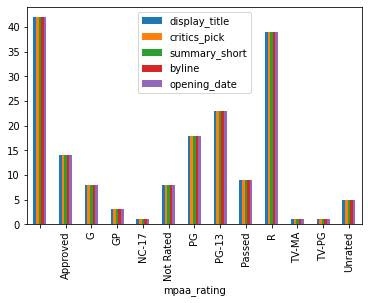

In [157]:
plt.figure()
rating = movieReviews.groupby('mpaa_rating').count()
rating.plot.bar()

The above plot is based on mpaa ratings vs total number of movies representing the mpaa ratings. The groupby method was not necessary in this case but we used it to show all other attributes of our dataframe. The first bar column represents missing mpaa ratings from our movie dataset. Below is a simple bar plot of the same. 

<AxesSubplot:title={'center':'Frequency Distribution by MPAA Rating'}>

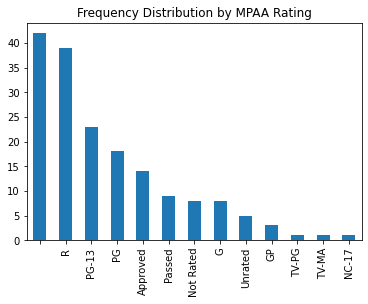

In [158]:
plt.figure()
rating = movieReviews['mpaa_rating'].value_counts()
rating.plot.bar(title = "Frequency Distribution by MPAA Rating")

The first bar in the x-axis representing mpaa_rating is the missing valus from our dataframe which surprisingly represents the most movies with missing mpaa rating values. R-rated movies has the most number of movies among all other mpaa rating with value about 40 movies. The secod most rated movie in our dataframe is the PG-13 rated movie whose value is close to 25. NC-17, TV-MA, TV-PG rated movies are represented as the least number of movies from the bar plot whose value lies within 0 and 5. 

<AxesSubplot:title={'center':'Frequency Dist. of byline(author)'}>

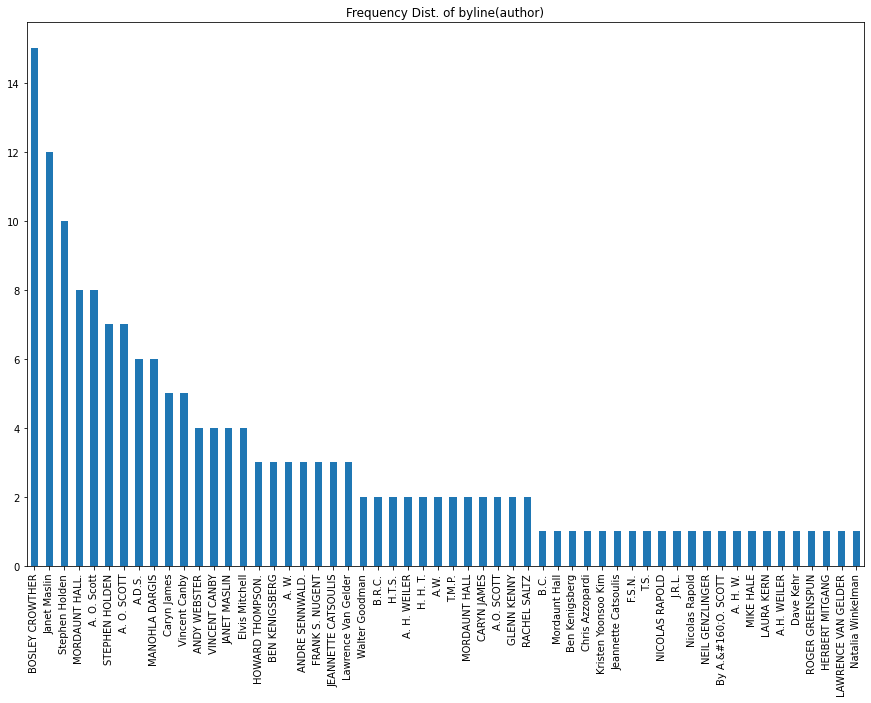

In [177]:
plt.figure(figsize=(15, 10))
movieReviews['byline'].value_counts().plot.bar(title = "Frequency Dist. of byline(author)")

The above plot represents the Author of the review and how many movies they have reviewed. Bosley Crowther has reviewed more than 14 movies which is the most in our dataframe. We can see a lot of authors of the review have reviewed the same number of movies with authors rating only 1 movie have the most frequency followed by authors reviewing 2 movies. 

<AxesSubplot:title={'center':"Critic's Pick"}>

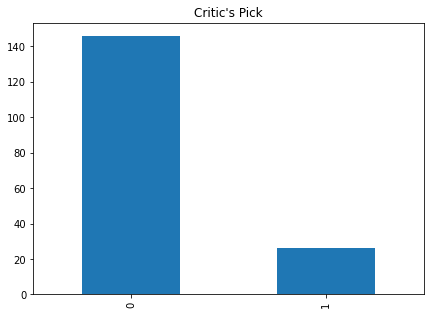

In [176]:
plt.figure(figsize=(7, 5))
movieReviews['critics_pick'].value_counts().plot.bar(title = "Critic's Pick")

In our dataframe only about 20 movies have been picked by the critic and more than 140 movies have not been critic picked. 